# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

Forest Cover Type
https://archive.ics.uci.edu/ml/datasets/Covertype

### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [1]:
# Bibliotecas
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # gráficos
import seaborn as sns # gráficos

In [2]:
# Leitura dos dados brutos

df = pd.read_csv("database/covtype.data", 
     engine='python')
df.head(5)     

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [3]:
# Nomeando as colunas
columns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40','Cover_Type']
df.columns = columns
df.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


Features: 

- Elevation - Elevação em metros
- Aspect - Aspecto em graus de azimute
- Slope - Declive em graus 
- Horizontal Distance to Hydrology - Distância horizontal até a próxima fonte de água 
- Vertical Distance to Hydrology - Distância vertical até a próxima fonte de água 
- Horizontal Distance to Roadways - Distância horizontal até uma rodovia
- Hillshade at 9am - Índice (0-255) de grau de sombra às 9:00 (solstício de verão)
- Hillshade at Noon - Índice (0-255) de grau de sombra ao meio-dia 
- Hillshade at 3pm - Índice (0-255) de grau de sombra às 3 da tarde
- Horizontal Distance to fire points - Distância horizontal até a mais próxima unidade de combate à incêndio
- Wilderness Area (4 colunas binárias) - Designação de área de região selvagem
- Soil Type (40 colunas binárias) - Designação de tipos de solo  
- Cover_Type (**target**) - Designação do tipo de cobertura florestal (1 - 7)

Classes do Target: 

- (1) Spruce/Fir - [Picea](https://pt.wikipedia.org/wiki/Picea)
- (2) Lodgepole Pine - [Pinus contorta](https://pt.wikipedia.org/wiki/Pinus_contorta)
- (3) Ponderosa Pine - [Pinus ponderosa](https://en.wikipedia.org/wiki/Pinus_ponderosa)
- (4) Cottonwood/Willow - [Choupo comum](https://pt.wikipedia.org/wiki/Populus)
- (5) Aspen - [Populus](https://en.wikipedia.org/wiki/Aspen)
- (6) Douglas-fir [Conífera sempre verde](https://en.wikipedia.org/wiki/Douglas_fir)
- (7) Krummholz [Pinus albicaulis](https://en.wikipedia.org/wiki/Krummholz)


In [4]:
# Explorando um pouco os dados
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051465
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792,1.396500
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.shape

(581011, 55)

Há 581.011 registros e correspondem à contagem das features, então não há dados faltantes.


In [6]:
# Tipos dos dados (todos numéricos)
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [7]:
# Verificando se há valores nulos
round(df.isnull().mean()*100,2)

Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                            0.0
Soil_Type10                       

(1, 507.61011773362765)

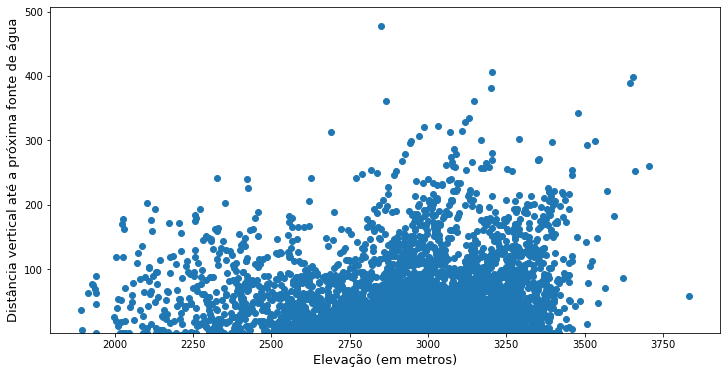

In [13]:
# Analisar elevação em relação à distância vertical da próxima fonte de água de 5000 registros aleatórios
dfPlot = df[['Elevation','Vertical_Distance_To_Hydrology']].sample(5000)
plt.figure(figsize=(12,6))
plt.scatter(x=dfPlot.Elevation, y=dfPlot.Vertical_Distance_To_Hydrology)
plt.xlabel("Elevação (em metros)", fontsize=13)
plt.ylabel("Distância vertical até a próxima fonte de água", fontsize=13)
plt.ylim(1)
# Garbage collection
del dfPlot

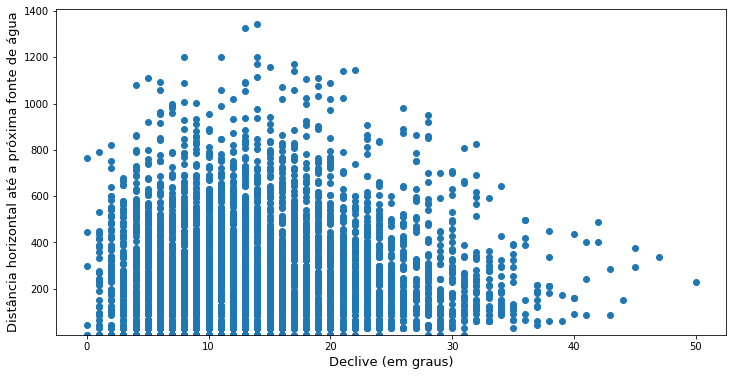

In [8]:
# Analisar declive em relação à distância horizontal da próxima fonte de água de 5000 registros aleatórios
dfPlot = df[['Slope','Horizontal_Distance_To_Hydrology']].sample(5000)
plt.figure(figsize=(12,6))
plt.scatter(x=dfPlot.Slope, y=dfPlot.Horizontal_Distance_To_Hydrology)
plt.xlabel("Declive (em graus)", fontsize=13)
plt.ylabel("Distância horizontal até a próxima fonte de água", fontsize=13)
plt.ylim(1)

# Garbage collection
del dfPlot

In [9]:
# Analisar a distribuição estatística de todas as features
pd.set_option('display.max_columns', None)
print(df.describe())

Elevation         Aspect          Slope  \
count  581011.000000  581011.000000  581011.000000   
mean     2959.365926     155.656988      14.103723   
std       279.984569     111.913733       7.488234   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581011.000000                   581011.000000   
mean                         269.428236                       46.418935   
std                          212.549538                       58.295250   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   

Insights:
- Não há nenhum registro com valores nulos, significa que a princípio todos os dados poderiam ser usados
- Valores negativos foram encontrados em Vertical_Distance_To_Hydrology, o que não faz sentido
- As features Soil_Type7 e Soil_Type15 poderiam ser removidas pois suas médias são as mais baixas 
- Talvez uma normalização seja necessária para agrupar os dados melhor, são de escalas muito diferentes


In [10]:
# Analisar a inclinação da distribuição
print(df.skew())

Elevation                              -0.817602
Aspect                                  0.402625
Slope                                   0.789274
Horizontal_Distance_To_Hydrology        1.140436
Vertical_Distance_To_Hydrology          1.790248
Horizontal_Distance_To_Roadways         0.713678
Hillshade_9am                          -1.181144
Hillshade_Noon                         -1.063054
Hillshade_3pm                          -0.277052
Horizontal_Distance_To_Fire_Points      1.288636
Wilderness_Area1                        0.205622
Wilderness_Area2                        4.061591
Wilderness_Area3                        0.257819
Wilderness_Area4                        3.575557
Soil_Type1                             13.736658
Soil_Type2                              8.615351
Soil_Type3                             10.838621
Soil_Type4                              6.625170
Soil_Type5                             18.995227
Soil_Type6                              9.240053
Soil_Type7          

Valores próximos de zero demonstram menos inclinação. Os tipos de solo tem inclinação muito grande, o que pode indicar erro nos dados

In [17]:
# Verificando a quantidade de linhas que pertencem a cada classe

print("Distribuição por tipo de conífera:",df.groupby('Cover_Type').size())
print("Total de registros: ", df.shape[0])

Distribuição por tipo de conífera: Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9492
6     17367
7     20510
dtype: int64
Total de registros:  581011


In [41]:
print('Visualização em percentual')
df1 = df.groupby('Cover_Type', as_index=False).size().reset_index(name='count')
df1['percentage']=round(df1['count']/df.shape[0]*100,2)
df1=df1.sort_values(by='count', ascending=False)
df1
# Garbage collection
del df1

Visualização em percentual


,Cover_Type,count,percentage
1,2,283301,48.76
0,1,211840,36.46
2,3,35754,6.15
6,7,20510,3.53
5,6,17367,2.99
4,5,9492,1.63
3,4,2747,0.47


Insight: Há muito mais coníferas dos tipos 1 e 2, portanto a probabilidade de amostras estarem entre estas é muito maior.

Text(0.5, 1.0, 'Distibuição do Cover_Type')

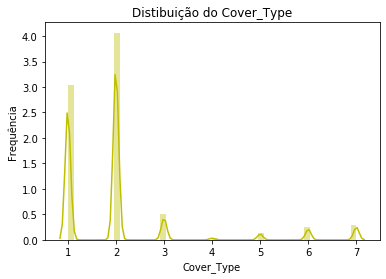

In [42]:
sns.distplot(df["Cover_Type"], color='y')
plt.ylabel('Frequência')
plt.title('Distibuição do Cover_Type')

Analisando a correlação entre alguns atributos



In [42]:
# Número de features a analisar 
features = 20 

# Novo dataset só com o número de features
data=df.iloc[:,:features] 

# nomes das colunas
cols=data.columns 

# Calcular o coeficiente de Pearson para todas as combinações
data_corr = data.corr()

# Limite para selecionar somente as correlações mais relevantes
threshold = 0.5

# Lista das correlações a serem calculadas
lista_correlacoes = []

# Busca dos pares de correlações mais relevantes
for i in range(0,features): 
    for j in range(i+1,features): # Evitar repetição
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            lista_correlacoes.append([data_corr.iloc[i,j],i,j]) # guardar a correlação e índice das colunas

# Organizar do maior para o menor         
correlacoes = sorted(lista_correlacoes,key=lambda x: -abs(x[0]))

# Mostrar correlações e nomes das colunas
print( "As maiores correlações entre features são: ")
for v,i,j in correlacoes:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))


As maiores correlações entre features são: 
Wilderness_Area1 and Wilderness_Area3 = -0.79
Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.65
Elevation and Wilderness_Area4 = -0.62
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.53


Insight: Pode ser interessante reduzir o número de features para somente estas

In [32]:
# Correlação entre as features de forma gráfica
#for v,i,j in correlacoes:
#    sns.pairplot(df, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
#    plt.show()

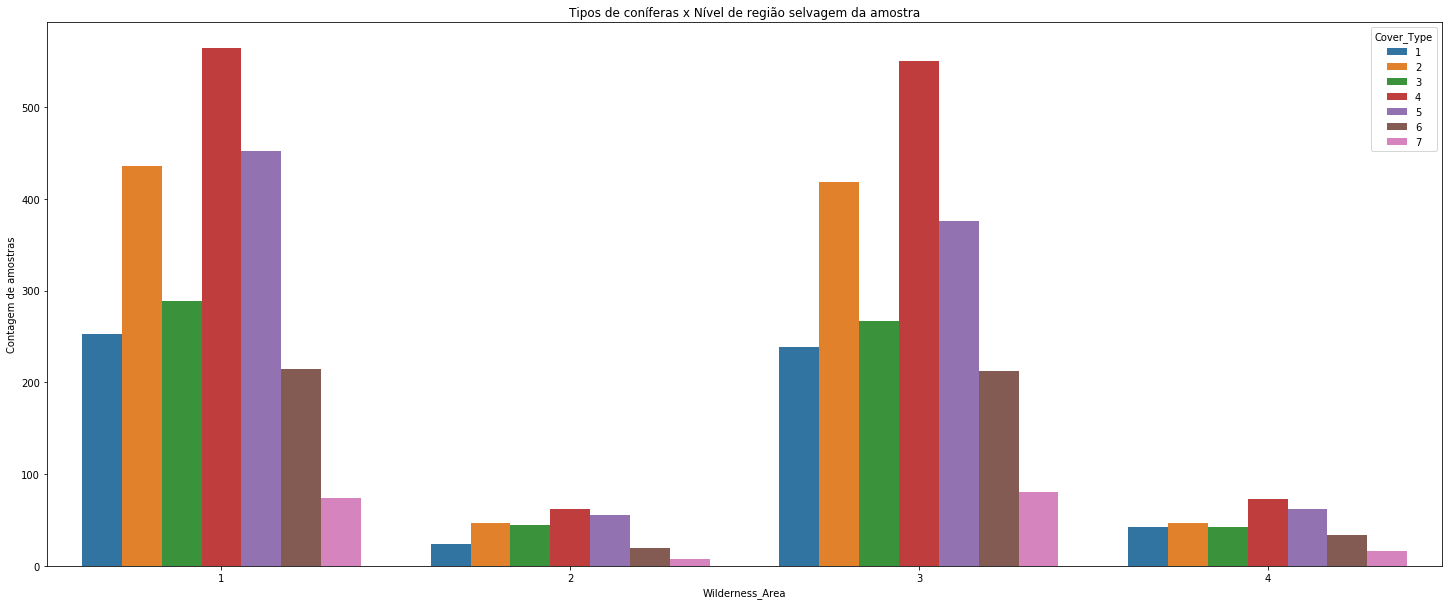

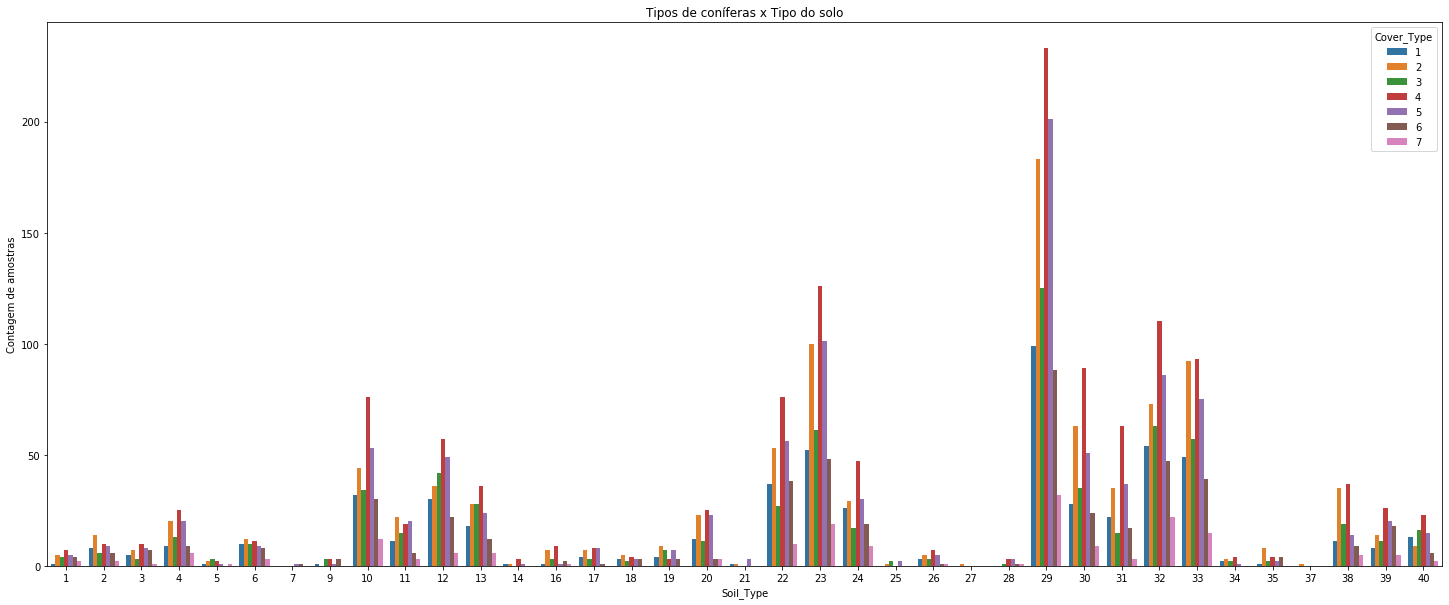

In [48]:
# Agrupando as features codificadas (Wilderness_Area, Soil_Type e CoverType) para melhor visualização
# A ideia é averiguar a relação entre os tipos de coníferas em relação aos tipos de solos e quão "selvagem" é a amostra

# Dataframe com 5000 registros aleatórios para esta análise (Com todos os registros é inviável, muito lento)
df1 = df.sample(5000)

# Nomes das features
cols = df.columns

# Número de linhas e colunas 
r,c = df1.shape

# Novo dataframe com o mesmo número de linhas, uma coluna para cada categoria codificada e o target
data = pd.DataFrame(index=np.arange(0, r),columns=['Wilderness_Area','Soil_Type','Cover_Type'])

# Criando o registro em "data" para cada amostra 
for i in range(0,r):
    w=0;
    s=0;
    # Faixa da primeira categoria
    for j in range(10,14):
        if (df1.iloc[i,j] == 1):
            w=j-9  #category class
            break
    # Faixa da segunda categoria        
    for k in range(14,54):
        if (df1.iloc[i,k] == 1):
            s=k-13 # Classe da categoria
            break
    
    data.iloc[i]=[w,s,df.iloc[i,c-1]]

# Gráfico da primeira categoria (Wilderness_Area x Cover_Type)
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=data)
plt.title('Tipos de coníferas x Nível de região selvagem da amostra')
plt.ylabel('Contagem de amostras')
plt.show()

# Gráfico da segunda categoria (Soil_Type x Cover_Type)
plt.rc("figure", figsize=(25, 10))
sns.countplot(x="Soil_Type", hue="Cover_Type", data=data)
plt.title('Tipos de coníferas x Tipo do solo')
plt.ylabel('Contagem de amostras')
plt.show()

# Garbage collection
del data



Insights: 
- WildernessArea_4 tem mais presença para o Cover_Type 4
WildernessArea_3 não tem muitas distinções
Os Tipos de solo 1-6,10-14,17, 22-23, 29-33,35,38-40 tem uma boa relação de presença

### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

*Indique o método escolhido*

#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [33]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [34]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [35]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.5) Qual método escolhido?

Indique o método escolhido

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [36]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [37]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [38]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*